In [1]:
%matplotlib inline
import PIL 
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
import os
import numpy as np
img_size = 128

dataset_name = 'retinopathy_dataset_resize_gray' # retinopathy_dataset_resize_gray
channel = 1

train_imgs = []
train_labels = []
test_imgs = []
test_labels =[]

In [3]:
for folder in ['train','test']:
    for level in ['0','1']:
        for file in os.listdir('./{}/{}/{}'.format(dataset_name,folder,level)):
            file_path = './{}/{}/{}/{}'.format(dataset_name,folder,level,file)
            img = Image.open(file_path)#.convert('L')
            
            if level =='0':
                label_onehot = np.array([1,0])
            elif level =='1':
                label_onehot = np.array([0,1])
            
            if folder =='train':
                train_imgs.append(np.array(img)/255) # RGB channel * size * size
                train_labels.append(label_onehot)
            if folder =='test':
                test_imgs.append(np.array(img)/255)
                test_labels.append(label_onehot)

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
train_imgs=np.array(train_imgs).reshape(len(train_imgs),128,128,1)
train_labels=np.array(train_labels).reshape(len(train_labels),2)

In [6]:
test_imgs=np.array(test_imgs).reshape(len(test_imgs),128,128,1)
test_labels=np.array(test_labels).reshape(len(test_imgs),2)

In [7]:
model=Sequential()

model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=(128,128,1),padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='linear'))
model.add(Dense(2, activation='softmax'))

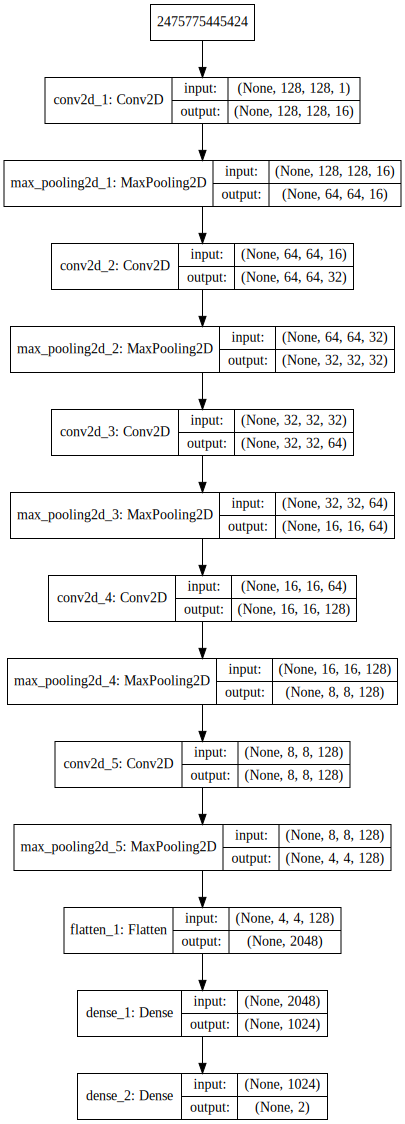

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
adam=keras.optimizers.Adam(lr=0.001)
#categorical_crossentropy=keras.backend.categorical_crossentropy(from_logits=True)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 5) # 조기종료 콜백함수 정의

#model.fit(train_imgs, train_labels, batch_size=64, epochs=5)
#score = model.evaluate(test_imgs, test_labels, batch_size=32)

hist = model.fit(train_imgs, train_labels, epochs=20, batch_size=64,
                validation_data=(test_imgs,test_labels))

Train on 1230 samples, validate on 292 samples
Epoch 1/60
1230/1230 [==============================] - 4s 3ms/step - loss: 0.7015 - acc: 0.4740 - val_loss: 0.6931 - val_acc: 0.4932
Epoch 2/60
1230/1230 [==============================] - 1s 635us/step - loss: 0.6931 - acc: 0.4919 - val_loss: 0.6926 - val_acc: 0.5000
Epoch 3/60
1230/1230 [==============================] - 1s 635us/step - loss: 0.6942 - acc: 0.4919 - val_loss: 0.6936 - val_acc: 0.4932
Epoch 4/60
1230/1230 [==============================] - 1s 635us/step - loss: 0.6925 - acc: 0.5130 - val_loss: 0.6910 - val_acc: 0.5411
Epoch 5/60
1230/1230 [==============================] - 1s 635us/step - loss: 0.6888 - acc: 0.5301 - val_loss: 0.6981 - val_acc: 0.4932
Epoch 6/60
1230/1230 [==============================] - 1s 635us/step - loss: 0.6835 - acc: 0.5545 - val_loss: 0.6803 - val_acc: 0.5514
Epoch 7/60
1230/1230 [==============================] - 1s 635us/step - loss: 0.6834 - acc: 0.5699 - val_loss: 0.6833 - val_acc: 0.5548
Epo

1230/1230 [==============================] - 1s 635us/step - loss: 5.1443e-04 - acc: 1.0000 - val_loss: 1.7822 - val_acc: 0.7226


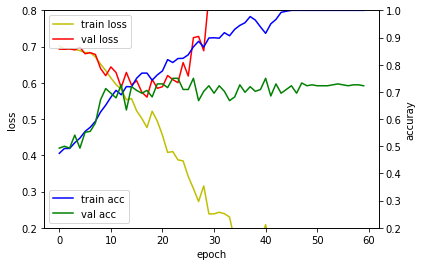

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.2, 0.8])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.2, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()